In [1]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [2]:
def get_points(path):
    try:
        f = open(path + 'log.txt', 'rb')
    except:
        return [], []
    fs = f.readlines()
    APL = []
    acc = []
    for l in fs:
        l = l.decode("utf-8").strip()
        APL.append(float(l.split(' ')[-1]))
        acc.append(float(l.split(';')[0].split(' ')[-1]))
        
    APL, acc = np.array(APL)[np.argsort(APL)], np.array(acc)[np.argsort(APL)]
    
    return APL, acc

class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)



In [3]:
def drawtest(t):
    path_n = t + 'tree_n/'
    path_t = t + 'tree_t/'
    path_l2 = t + 'tree_l2/'
    path_l1 = t + 'tree_l1/'
    apl_n, acc_n = get_points(path_n)
    apl_t, acc_t = get_points(path_t)
    apl_l2, acc_l2 = get_points(path_l2)
    apl_l1, acc_l1 = get_points(path_l1)
    %matplotlib inline
    fig = plt.figure(figsize =(10, 6), dpi=128, facecolor="white")
    font={'family': 'serif', 'color':'darkred', 'weight':'normal', 'size':16} 
    ax = plt.gca()
    plt.plot(apl_n, acc_n, c='b') 
    plt.plot(apl_t, acc_t, c='y') 
    plt.plot(apl_l2, acc_l2, c='r') 
    plt.plot(apl_l1, acc_l1, c='g') 
    # plt . plot (xln , yln , c=’b’ , markerfacecolor = ’0.75 ’ , markersize = 3, linewidth =0.8)
    # plt. plot (xln , yminln , c=’y’ , markerfacecolor = ’0.75 ’ , markersize = 3, linewidth =0.5) 
    plt.legend(["Decision Tree", "Tree Regularization", "l2 Regularization", "l1 Regularization"]) 
    # plt.title(”$\ln \epsilon_n$ en fonction de $\ln n$ avec Regression lineaire”, font) 
    plt.xlabel("APL", font)
    plt.ylabel("Accuracy", font)

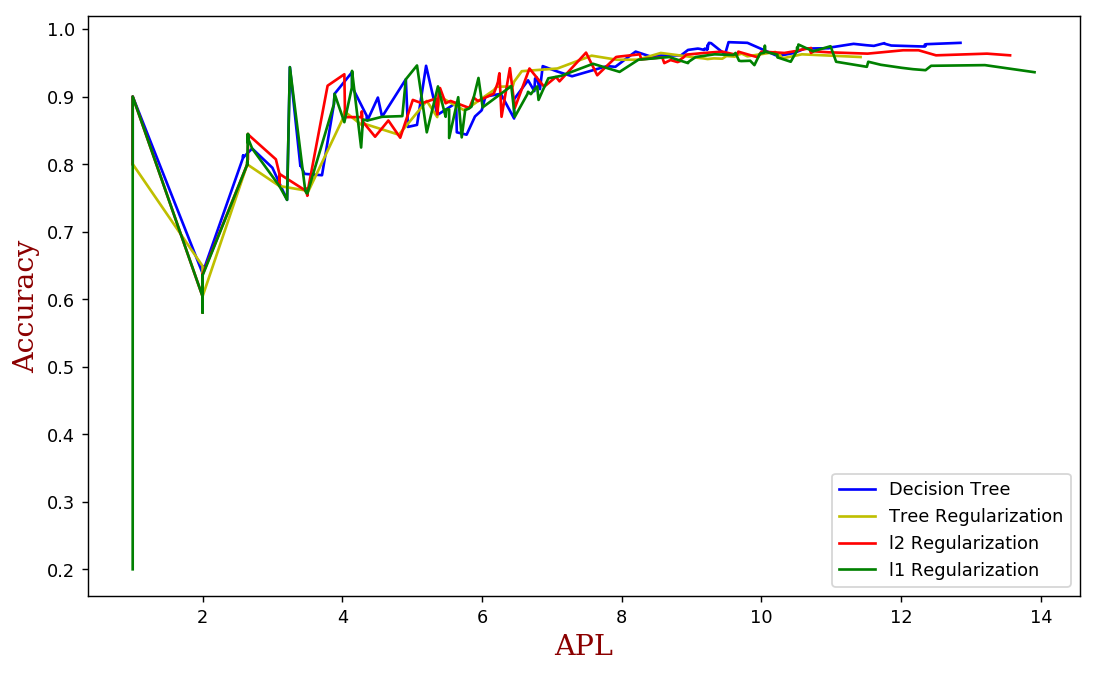

In [4]:
drawtest('./A_10/')
# Training set: normal-2500 cpu_contention-2500 input_rate-2500 node_failure-2500(440+RandomOverSampler generated)
# Testing set: normal-5000 cpu_contention-230 input_rate-230 node_failure-40 (10% abnormal)

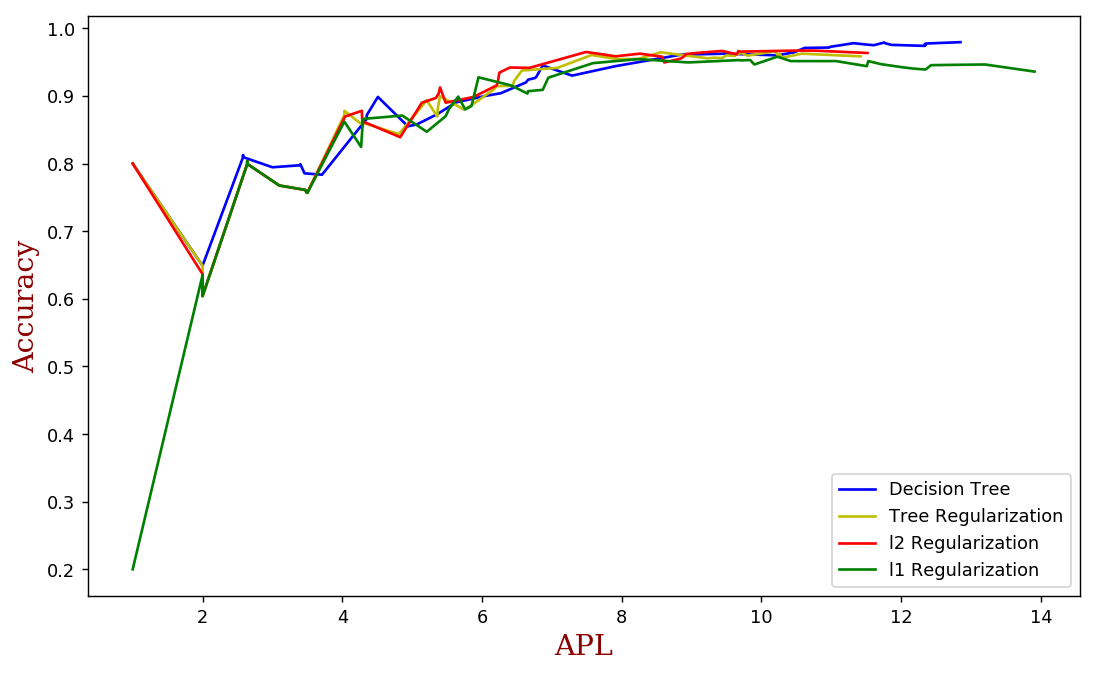

In [5]:
drawtest('./A_20/')

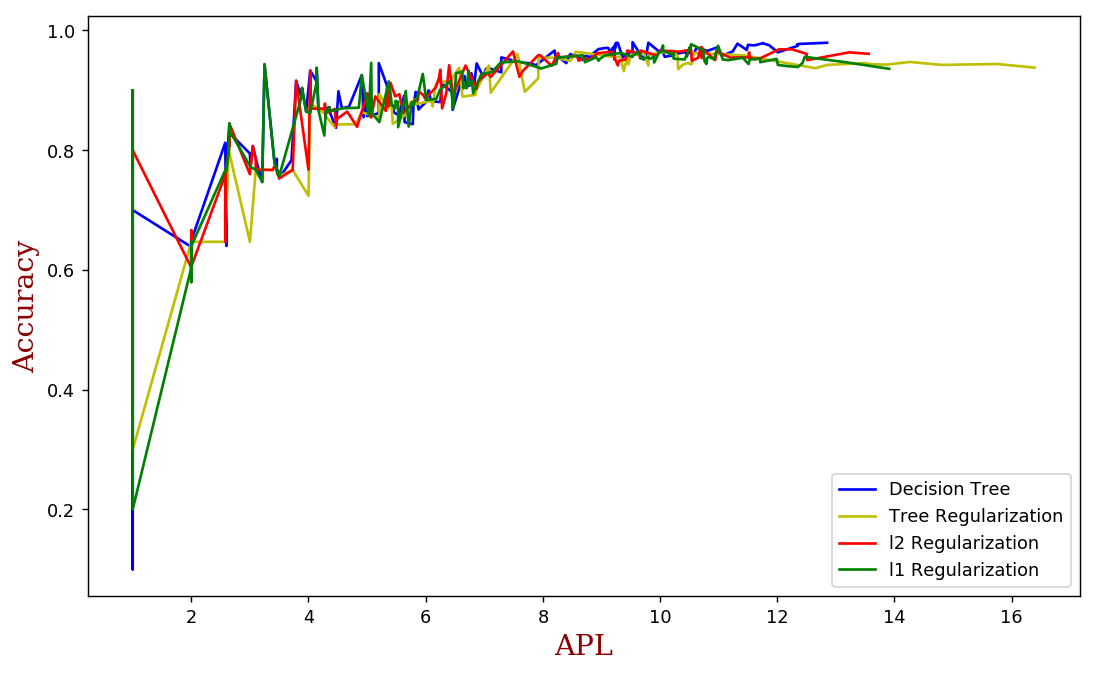

In [6]:
drawtest('./A_30/')

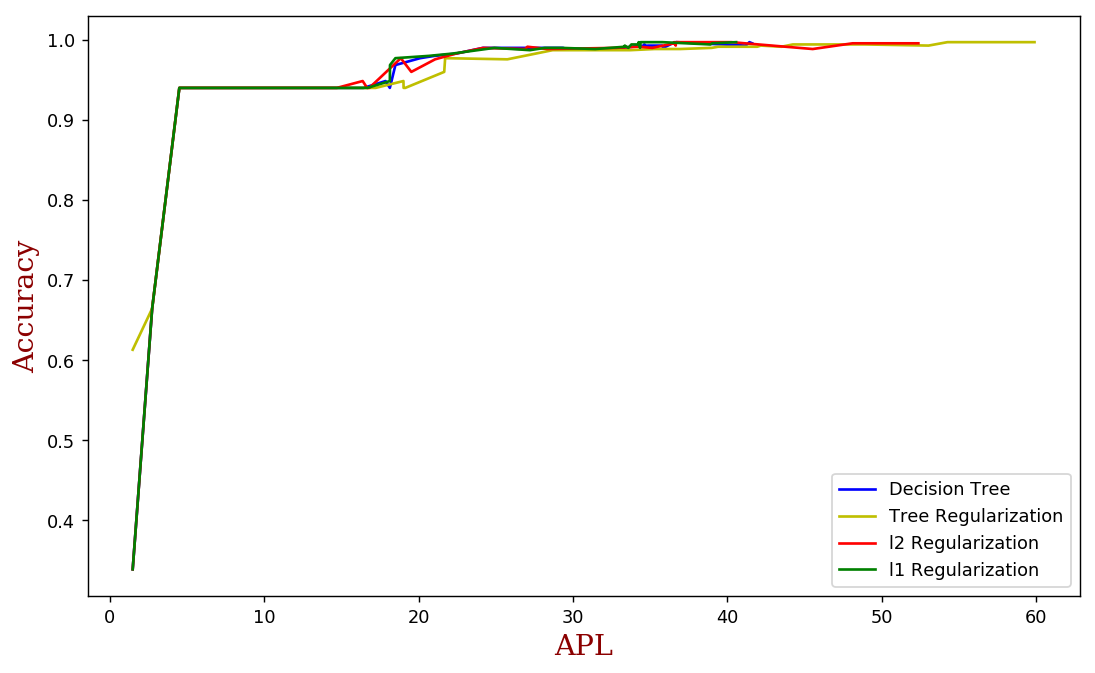

In [69]:
drawtest('./testset2/')
# Training set: normal-2500 cpu_contention-2500 input_rate-2500 node_failure-2500(440+RandomOverSampler generated)
# Testing set: normal-200 cpu_contention-230 input_rate-230 node_failure-40 (60% abnormal)

In [93]:
PDF('./testset2/tree_t/tree0.pdf',size=(800,500))

In [97]:
PDF('./testset2/tree_t/tree31.pdf',size=(800,500))

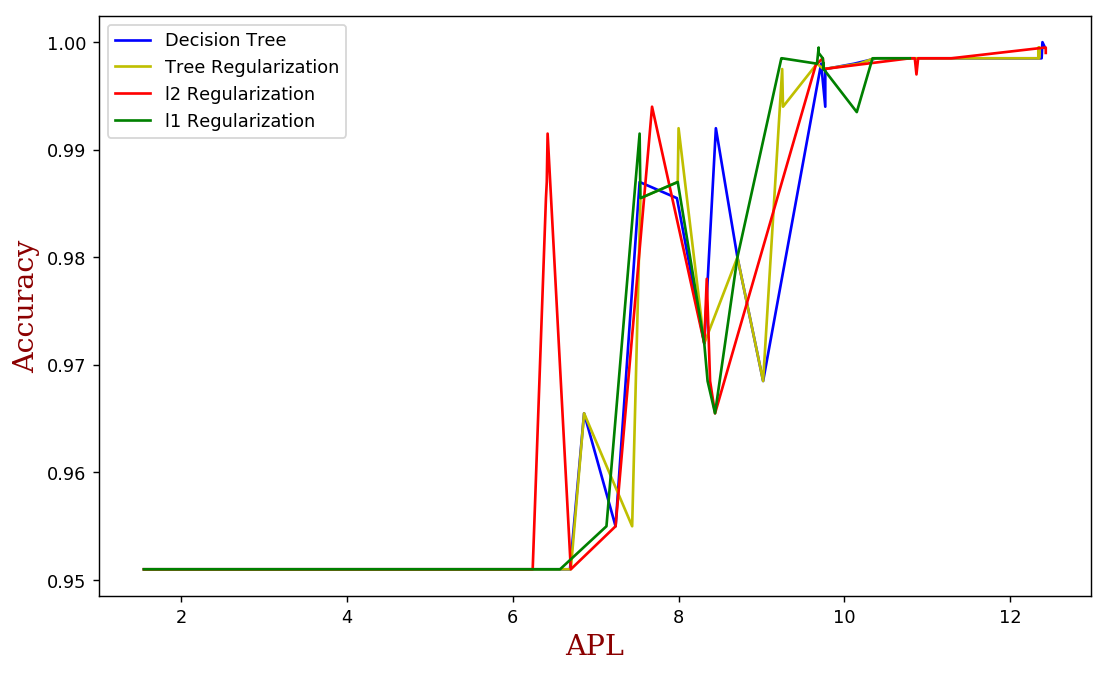

In [98]:
drawtest('./testset3/')
# Training set: normal-5000 abnormal-5000(mixed)
# Testing set: normal-1000 abnormal-1000(mixed)

In [99]:
PDF('./testset3/tree_t/tree0.pdf',size=(800,500))

In [100]:
PDF('./testset3/tree_t/tree32.pdf',size=(800,500))